In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import math
import random as randn
import datetime
from pandas import Series, DataFrame
from bokeh.plotting import figure
from bokeh.io import output_file, show
%matplotlib inline
import nltk
import scipy.sparse as sparse
from datetime import datetime

In [3]:
hot = pd.read_csv('/Users/Priya/Downloads/datafiniti-hotel-reviews/7282_1.csv')
hot.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [4]:
hot.rename(columns = {'reviews.date':'reviews_date', "reviews.dateAdded":"reviews_dateAdded","reviews.doRecommend":"reviews_doRecommend","reviews.id":"reviews_id","reviews.rating":"reviews_rating", "reviews.text":"reviews_text","reviews.title":"reviews_title","reviews.userCity":"reviews_userCity","reviews.username":"reviews_username","reviews.userProvince":"reviews_userProvince"}, inplace = True)
hot.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews_date,reviews_dateAdded,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_username,reviews_userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [5]:
# Top 10 hotels with most reviews. 

hot_revs = hot[['name', 'reviews_text']]
hot_revs.head(10)

,name,reviews_text
0,Hotel Russo Palace,Pleasant 10 min walk along the sea front to th...
1,Hotel Russo Palace,Really lovely hotel. Stayed on the very top fl...
2,Hotel Russo Palace,Ett mycket bra hotell. Det som drog ner betyge...
3,Hotel Russo Palace,We stayed here for four nights in October. The...
4,Hotel Russo Palace,We stayed here for four nights in October. The...
5,Hotel Russo Palace,We loved staying on the island of Lido! You ne...
6,Hotel Russo Palace,Lovely view out onto the lagoon. Excellent vie...
7,Hotel Russo Palace,ottimo soggiorno e ottima sistemazione nei gio...
8,Hotel Russo Palace,Gnstiger Ausgangspunkt fr Venedig Besuche. Ruh...
9,Hotel Russo Palace,Lidoen er perfekt til et par dages ro og afsla...


In [6]:
hot_revs_most = hot_revs['name'].value_counts()
print('Top 10 hotels with most reviews:')
hot_revs_most.head(10)

Top 10 hotels with most reviews:


The Alexandrian, Autograph Collection          1185
Howard Johnson Inn - Newburgh                   714
Americas Best Value Inn                         567
Fiesta Inn and Suites                           546
Ip Casino Resort Spa                            392
Best Western Plus Waterville Grand Hotel        335
Hampton Inn Virginia Beach Oceanfront North     334
Comfort Suites                                  326
New York Marriott Marquis                       320
Best Western of Long Beach                      317
Name: name, dtype: int64

In [8]:
from matplotlib import pylab

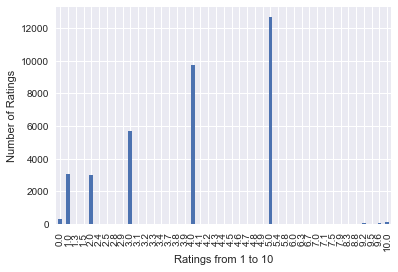

In [9]:
(hot.reviews_rating).value_counts().sort_index().plot(kind='bar')
pylab.xlabel('Ratings from 1 to 10')
pylab.ylabel('Number of Ratings')

In [301]:
hot[['reviews_rating','reviews_text']].head()

,reviews_rating,reviews_text
0,4.0,Pleasant 10 min walk along the sea front to th...
1,5.0,Really lovely hotel. Stayed on the very top fl...
2,5.0,Ett mycket bra hotell. Det som drog ner betyge...
3,5.0,We stayed here for four nights in October. The...
4,5.0,We stayed here for four nights in October. The...


In [302]:
# Finding the missing values in ratings and text

hot.isnull().sum()

address                     0
categories                  0
city                        0
country                     0
latitude                   86
longitude                  86
name                        0
postalCode                 55
province                    0
reviews_date              259
reviews_dateAdded           0
reviews_doRecommend     35912
reviews_id              35912
reviews_rating            862
reviews_text               22
reviews_title            1621
reviews_userCity        19649
reviews_username           43
reviews_userProvince    18394
dtype: int64

In [303]:
hot1 = hot.copy()

In [304]:
hot1

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews_date,reviews_dateAdded,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_username,reviews_userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN
5,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We loved staying on the island of Lido! You ne...,Very nice hotel,NaN,A Traveler,NaN
6,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-06-10T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Lovely view out onto the lagoon. Excellent vie...,Lovely view out onto the lagoon. Excellent view.,NaN,A Traveler,NaN
7,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-05-14T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,ottimo soggiorno e ottima sistemazione nei gio...,Lovely view out onto the lagoon. Excellent view.,NaN,A Traveler,NaN
8,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-09-14T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,3.0,Gnstiger Ausgangspunkt fr Venedig Besuche. Ruh...,G��nstige Lage,NaN,Doppeldecker,NaN
9,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-05-16T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Lidoen er perfekt til et par dages ro og afsla...,Ro og hygge,NaN,A Traveler,NaN


In [305]:
hot1 = hot1[['reviews_rating', 'reviews_text']]

In [362]:
hot1.head()

,reviews_rating,reviews_text
0,0,Pleasant 10 min walk along the sea front to th...
1,1,Really lovely hotel. Stayed on the very top fl...
2,1,Ett mycket bra hotell. Det som drog ner betyge...
3,1,We stayed here for four nights in October. The...
4,1,We stayed here for four nights in October. The...


In [363]:
hot1['reviews_rating'].fillna('0').head()

0    0
1    1
2    1
3    1
4    1
Name: reviews_rating, dtype: int64

In [308]:
hot1.groupby('reviews_rating')['reviews_text'].count()

reviews_rating
0.0       337
1.0      3065
1.3         1
1.5         1
2.0      2978
2.4         4
2.5         3
2.8         1
2.9         1
3.0      5705
3.1         7
3.2         2
3.3         6
3.4        17
3.7         2
3.8         3
3.9         2
4.0      9747
4.1        14
4.2        22
4.3        26
4.4         6
4.5        13
4.6         7
4.7         6
4.8        25
4.9         6
5.0     12664
5.4         9
5.8         6
6.0         1
6.3        14
6.7        12
7.0         1
7.1        13
7.5        24
7.9        24
8.3        25
8.8        24
9.2        49
9.5         1
9.6        53
10.0      101
Name: reviews_text, dtype: int64

In [309]:
# Setting values 0 and 1 for ratings (0 being ratings less than 5 and 1 being ratings equal to or greater than 5)

hot1["reviews_rating"] = hot1["reviews_rating"].apply(lambda x: '1' if x >= 5 else '0')

/Users/Priya/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


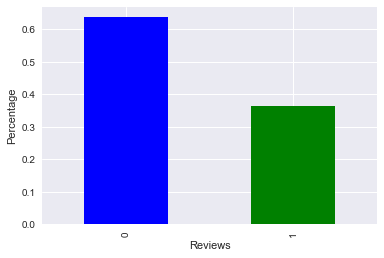

In [310]:
hot1['reviews_rating'].value_counts('1').plot(kind='Bar', color=['b','g'])
plt.xlabel('Reviews')
plt.ylabel('Percentage')

In [311]:
hot1['reviews_rating'].value_counts('1')*100

0    63.722433
1    36.277567
Name: reviews_rating, dtype: float64

In [312]:
hot1['reviews_rating'].dtype

dtype('O')

In [313]:
hot1['reviews_rating'] = hot1['reviews_rating'].astype(int)

/Users/Priya/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [314]:
hot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 2 columns):
reviews_rating    35912 non-null int64
reviews_text      35890 non-null object
dtypes: int64(1), object(1)
memory usage: 561.2+ KB


In [315]:
# The top 10 cities from where users reviewed hotels.

hot1_visit = hot[['reviews_userCity','reviews_userProvince']]
hot1_visit.head()

,reviews_userCity,reviews_userProvince
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [316]:
hot1_visit_most = hot1_visit['reviews_userCity'].value_counts()
print('Top 10 cities from where users visited hotels:')
hot1_visit_most.head(10)

Top 10 cities from where users visited hotels:


Chicago             205
Phoenix             183
New York City       151
Tempe               140
Weipa               125
Atlanta             119
Wantagh             117
Akron                99
Colorado Springs     93
Houston              91
Name: reviews_userCity, dtype: int64

In [317]:
# The provinces of users who reviewd hotels the most:

rev_upro = hot[['reviews_userProvince']]
rev_upro.head()

,reviews_userProvince
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [318]:
rev_upro_most = rev_upro['reviews_userProvince'].value_counts()
print('Top 10 provinces from where users reviewed the hotels most:')
rev_upro_most.head(10)

Top 10 provinces from where users reviewed the hotels most:


CA    1172
TX     951
FL     903
NY     829
IL     778
OH     758
MI     584
VA     561
CO     502
PA     498
Name: reviews_userProvince, dtype: int64

In [319]:
from pandas import DataFrame

In [320]:
from datetime import datetime

In [321]:
# The months during which hotels were reviewed the most

hot_revdate = hot[['name', 'reviews_date']]
hot_revdate.head(10)

,name,reviews_date
0,Hotel Russo Palace,2013-09-22T00:00:00Z
1,Hotel Russo Palace,2015-04-03T00:00:00Z
2,Hotel Russo Palace,2014-05-13T00:00:00Z
3,Hotel Russo Palace,2013-10-27T00:00:00Z
4,Hotel Russo Palace,2015-03-05T00:00:00Z
5,Hotel Russo Palace,2015-04-05T00:00:00Z
6,Hotel Russo Palace,2014-06-10T00:00:00Z
7,Hotel Russo Palace,2015-05-14T00:00:00Z
8,Hotel Russo Palace,2015-09-14T00:00:00Z
9,Hotel Russo Palace,2015-05-16T00:00:00Z


In [322]:
hot['reviews_date'].head()

0    2013-09-22T00:00:00Z
1    2015-04-03T00:00:00Z
2    2014-05-13T00:00:00Z
3    2013-10-27T00:00:00Z
4    2015-03-05T00:00:00Z
Name: reviews_date, dtype: object

In [323]:
from dateutil import parser

In [324]:
from datetime import tzinfo, timedelta

In [325]:
dt = parser.parse("2013-09-22T00:00:00Z")

In [326]:
ds = '2012-03-01T10:00:00Z'

In [327]:
date = parser.parse(ds)

In [328]:
datetime.strptime('2013-09-22T00:00:00Z','%Y-%m-%dT%H:%M:%SZ')

datetime.datetime(2013, 9, 22, 0, 0)

In [329]:
hot_year = hot['reviews_date'] =  pd.to_datetime(hot['reviews_date'], format='%Y-%m-%dT%H:%M:%SZ')

In [330]:
hot_year.head()

0   2013-09-22
1   2015-04-03
2   2014-05-13
3   2013-10-27
4   2015-03-05
Name: reviews_date, dtype: datetime64[ns]

In [331]:
hot["month"] = hot["reviews_date"].apply (lambda x : x.month)

In [332]:
hot['month'] = pd.DatetimeIndex(hot['reviews_date']).month

In [333]:
hot.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews_date,reviews_dateAdded,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_username,reviews_userProvince,month
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN,9.0
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN,4.0
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN,5.0
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN,10.0
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN,3.0


In [334]:
months = hot[['month']].head()

In [335]:
months.head()

,month
0,9.0
1,4.0
2,5.0
3,10.0
4,3.0


In [336]:
print('Months in which hotels were reviewed the most:')
hot['month'].value_counts()

Months in which hotels were reviewed the most:


7.0     4970
8.0     4326
6.0     3842
9.0     3343
10.0    3281
5.0     3230
4.0     2784
3.0     2473
2.0     1939
1.0     1860
11.0    1843
12.0    1762
Name: month, dtype: int64

In [337]:
# June, July and August seem to be the months in which hotels were reviewed the most. 
# This could be becuase it is the summer time and people usually go on vacations.

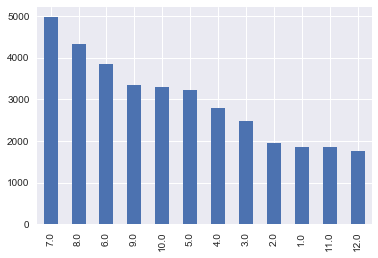

In [338]:
hot['month'].value_counts().plot(kind = 'bar')